# Housing Data Overview

Guide to using the Zillow Housing Data.

The data was downloaded from [Zillow](https://www.zillow.com/research/data/), from the Home Values section.
The data type is "ZHVI All Homes (SFR, Condo/Co-op) Time-series, Smoothed, Seasonally Adjusted($)" at the ZIP code geography level.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading Cleaned data from CSVs

The data has been organized a little bit since being downloaded.
There are two CSV files:
 1. The file `zip_code_housing.csv` contains the average home prices with the ZIP codes (RegionName) as the column and the month index as the index, from 0 to 300 (301 months altogether).
2. The file `housing_labels.csv` contains other information about the zip code, not necessarily for numerical analysis.

### Housing Prices by ZIP code

In [27]:
housing_prices_by_zip = pd.read_csv("zip_code_housing.csv", index_col=0) # Index col 0 makes the months the index
housing_prices_by_zip.index = pd.DatetimeIndex(housing_prices_by_zip.index)
housing_prices_by_zip

,77494,8701,77449,11368,77084,79936,11385,78660,11208,90011,...,22722,46799,22731,26576,15731,14441,98628,52163,82515,50160
2000-01-31,209050.476760,129618.780605,103655.528341,146323.411563,102106.861831,88633.200261,255733.884589,155973.548971,181265.236908,114336.290627,...,NaN,NaN,NaN,NaN,NaN,95200.506993,NaN,NaN,NaN,NaN
2000-02-29,209231.913691,130153.753933,103669.851313,147777.717600,102064.039251,88618.143584,256834.632805,156276.865616,181506.032127,114796.170719,...,NaN,NaN,NaN,NaN,NaN,95553.836805,NaN,NaN,NaN,NaN
2000-03-31,209716.734870,130515.338580,103542.615526,148870.075096,101882.723631,88637.365243,258228.032631,156429.245349,181810.444214,115481.475181,...,NaN,NaN,NaN,NaN,NaN,95874.535523,NaN,NaN,NaN,NaN
2000-04-30,210695.968954,131431.381532,103532.881663,150693.444823,101799.887119,88614.503616,260191.159961,156824.184946,182649.069337,116541.664692,...,NaN,NaN,NaN,NaN,NaN,95911.408909,NaN,NaN,NaN,NaN
2000-05-31,210730.995991,132384.399928,103580.144203,152001.119754,101775.245615,88639.211486,261601.911738,157163.600766,183926.600131,117478.740008,...,NaN,NaN,NaN,NaN,NaN,96085.887575,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,496096.305465,594583.485735,281502.991848,453320.495788,273631.254558,210733.924161,788938.933476,395598.285292,678725.801426,588271.914812,...,369822.675772,187161.346390,357466.089348,110199.746962,73948.561319,225156.691276,177621.288376,114988.321750,173265.888713,198489.179930
2024-10-31,497215.161891,599788.275075,281086.410278,453075.343776,273125.765642,210920.609526,792852.336870,394642.363362,679499.938453,593521.535079,...,370642.270781,188725.161301,358302.230162,110978.454570,73926.260880,227314.268636,176436.410504,115144.245078,173444.634292,199001.795336
2024-11-30,497931.319966,603106.031473,280298.902221,451863.571974,272528.815424,211074.181393,796447.626327,393351.889719,679562.768661,598098.952103,...,371671.534850,190638.564374,359295.856067,111542.184088,73442.410612,228544.608118,175243.019479,115385.629679,172971.964088,199616.160375
2024-12-31,498348.024838,605075.749335,279570.221742,449627.300182,272190.921082,211252.695787,799351.739735,391392.125550,678573.098758,601662.108744,...,373239.441582,192821.726217,361480.103456,111819.617130,72645.389609,228472.620494,174289.080960,115883.514220,172685.454192,200645.250133


You can view the housing prices for a given zip code by indexing the dataframe with the zip code you want.
For example, my home zip code is 84062, so my zip code's housing data is:

In [28]:
housing_prices_by_zip['84062']

2000-01-31              NaN
2000-02-29              NaN
2000-03-31              NaN
2000-04-30              NaN
2000-05-31    181155.315627
                  ...      
2024-09-30    548630.338815
2024-10-31    551140.399883
2024-11-30    554415.060473
2024-12-31    557262.632590
2025-01-31    559130.147132
Name: 84062, Length: 301, dtype: float64

Note the peaks around the 2008 recession and around 2020.

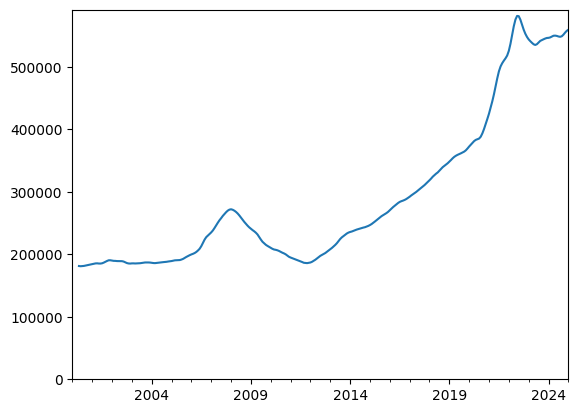

In [29]:
housing_prices_by_zip['84062'].plot()
plt.ylim(0, housing_prices_by_zip['84062'].max() + 10000)
plt.show()

### Housing Labels

In [17]:
housing_info = pd.read_csv("housing_labels.csv", index_col=0)
housing_info

,RegionID,SizeRank,RegionType,StateName,State,City,Metro,CountyName
RegionName,,,,,,,,
77494,91982,1,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County
8701,61148,2,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County
77449,91940,3,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County
11368,62080,4,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County
77084,91733,5,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County
...,...,...,...,...,...,...,...,...
14441,63527,39992,zip,NY,NY,Dresden,"Rochester, NY",Yates County
98628,99927,39992,zip,WA,WA,Klickitat,NaN,Klickitat County
52163,80861,39992,zip,IA,IA,Protivin,NaN,Howard County


You can also view the information about a given zip code by using `.loc` on the `housing_info` dataframe.

In [19]:
housing_info.loc[84062]

RegionID               94427
SizeRank                1263
RegionType               zip
StateName                 UT
State                     UT
City          Pleasant Grove
Metro         Provo-Orem, UT
CountyName       Utah County
Name: 84062, dtype: object